In [1]:

#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [4]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def treat_color(img):
    gray_img = grayscale(img)    

    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # define range of color in HSV
    lower_yel = np.array([10,110,200])
    upper_yel = np.array([45,255,255])
    lower_wht = np.array([0,0,230])
    upper_wht = np.array([255,255,255])
    
    # Select yellow and whites whithin desired range
    yellow_mask = cv2.inRange(hsv_img, lower_yel, upper_yel)
    white_mask = cv2.inRange(hsv_img, lower_wht, upper_wht)
    
    # Combine yellow and white masks
    full_mask = cv2.bitwise_or(yellow_mask, white_mask)
    
    subdued_gray = (gray_img / 3).astype('uint8')
    
    treated_img = cv2.bitwise_or(subdued_gray, full_mask)
    return treated_img
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    """
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    lines = get_lines(lines, img_shape=img.shape)

    if lines is not None:
        for line in lines:
            #print(line)
            if line is not None:
                for x1,y1,x2,y2 in line:
                    cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [50]:
from PIL import Image
img = Image.open('/home/wroscoe/mydonkey/sessions/1115am/frame_00002_ttl_0.4405375138285057_agl_0.16970498490926184_mil_0.0.jpg')

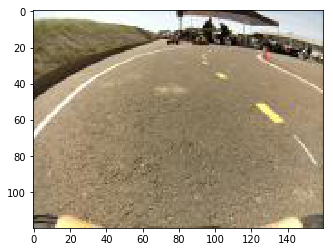

In [51]:
plt.imshow(img)

In [52]:
img=np.array(img)
img = treat_color(img)

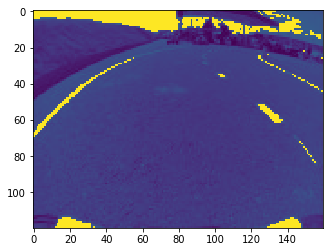

In [53]:
plt.imshow(img)

In [77]:

x = img.shape[1]
y = img.shape[0]


vertices = np.array([[(x*0.,y*.9),(x*.175, y*.400), (x*.825, y*.400), (x,y*.9)]], dtype=np.int32)


In [78]:
vertices

array([[[  0, 108],
        [ 28,  48],
        [132,  48],
        [160, 108]]], dtype=int32)

In [79]:
img_i = region_of_interest(img, vertices)

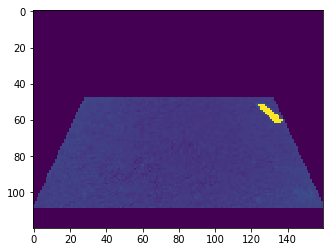

In [80]:
plt.imshow(img_i)